In [136]:
import pandas as pd
import seaborn as sns
import networkx as nx
import os
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.3, the latest is 0.3.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
sttc_dir = os.listdir('/Volumes/Seagate Backup Plus Drive/STTC_data')

In [3]:
wk_files = sttc_dir[1:-2]

In [98]:
sttc_vals = []
genotypes = []

In [99]:
gmetrics_dic = {'Genotype':[], 'Connected':[], 'Threshold':[], 'No. Nodes':[], 'No. Edges':[], 'Density':[], 'Avg. Clustering':[], 'Global Eff.':[], 'Avg. Shortest Path':[], 'sigma':[]}

In [100]:
for wk_file in wk_files:
    #read the file
    eg_file = pd.read_csv('/Volumes/Seagate Backup Plus Drive/STTC_data'+'/'+wk_file)
    # transform to wide format
    sttc_mat = eg_file.pivot(index='Node_1', columns='Node_2', values='STTC_weight')
    #find the threshold
    th_values = np.arange(eg_file['STTC_weight'].min(), eg_file['STTC_weight'].max(), 0.001)
    p_ch = []
    for ii in th_values:
        wk_df = sttc_mat[sttc_mat > ii].dropna(axis = 0, how = 'all')
        wk_df = wk_df[wk_df > ii].dropna(axis = 1, how = 'all')
        cols = wk_df.columns
        idx = wk_df.index
        intersect = set(cols).intersection(set(idx))
        max_ed = len(cols)*len(idx)-len(intersect)
        wk_sum = wk_df.notnull().sum().sum()
        wk_p = wk_sum / max_ed
        p_ch.append(wk_p)
    # Get the values of the vector
    k = np.array(p_ch)
    k = k[~np.isnan(k)]
    k_min = np.argmin(k[k>0])
    thd = th_values[k_min] # threshold value
    
    #plot it
    th_fig = plt.figure(figsize=(7,5))
    ax = th_fig.add_subplot()
    plt.plot(th_values, p_ch)
    plt.title('Threshold Definition by Edge Density Minimization')
    plt.xlabel('STTC')
    plt.ylabel('Edge Density (K)')
    plt.axvline(thd, 0, .5, color = 'r', linestyle = '--')
    plt.annotate('threshold', xy = (th_values[k_min], .6), xytext = (-5, 15), textcoords = 'offset points', color = 'r', rotation = 90)
    plt.minorticks_on()
    th_fig.savefig(f'/Users/labc02/Documents/PDCB_data/Figures/{wk_file}_th.png', dpi = 600)
    plt.close()
    #apply threshold on original dataframe
    thd_df = eg_file[eg_file['STTC_weight']>=thd]
    thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal
    sttc_vals.append(thd_df['STTC_weight'])
    genotypes.append(thd_df['Gen_type'])
    #build the graph
    sttc_g = nx.from_pandas_edgelist(df=thd_df, source='Node_1', target='Node_2', edge_attr='weight')
    #get metrics
    gmetrics_dic['Threshold'].append(thd)
    gmetrics_dic['Genotype'].append(eg_file['Gen_type'].unique().item())
    gmetrics_dic['Connected'].append(nx.is_connected(sttc_g))
    gmetrics_dic['No. Nodes'].append(nx.number_of_nodes(sttc_g))
    gmetrics_dic['No. Edges'].append(nx.number_of_edges(sttc_g))
    gmetrics_dic['Density'].append(nx.density(sttc_g))
    gmetrics_dic['Avg. Clustering'].append(nx.average_clustering(sttc_g))
    gmetrics_dic['Global Eff.'].append(nx.global_efficiency(sttc_g))
    try:
        gmetrics_dic['Avg. Shortest Path'].append(nx.average_shortest_path_length(sttc_g))
        gmetrics_dic['sigma'].append(nx.sigma(sttc_g, seed=101))
    except:
        print('Not connected')
        Gc = max(nx.connected_components(sttc_g), key=len)
        gmetrics_dic['Avg. Shortest Path'].append(nx.average_shortest_path_length(sttc_g.subgraph(Gc)))
        gmetrics_dic['sigma'].append(nx.sigma(sttc_g.subgraph(Gc), seed=101))
        

<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal
<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal
<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


Not connected


<ipython-input-100-9c44fa5a460a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_df['weight']=1/thd_df['STTC_weight'] #set sttc value to its reciprocal


In [102]:
metrics_df = pd.DataFrame(gmetrics_dic)

In [74]:
for idx, value in enumerate(metrics_df['Genotype']):
    metrics_df['Genotype'].iloc[idx]=value.item()

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


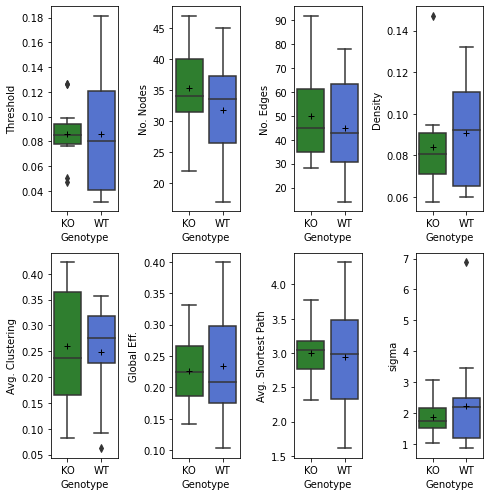

In [103]:
met_fig, axs= plt.subplots(figsize=(7,7), nrows=2, ncols=4)
sns.boxplot(x='Genotype', y='Threshold', data=metrics_df, ax= axs[0][0], palette=['forestgreen', 'royalblue'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.8)
sns.boxplot(x='Genotype', y='No. Nodes', data=metrics_df, ax= axs[0][1], palette=['forestgreen', 'royalblue'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.8)
sns.boxplot(x='Genotype', y='No. Edges', data=metrics_df, ax= axs[0][2], palette=['forestgreen', 'royalblue'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.8)
sns.boxplot(x='Genotype', y='Density', data=metrics_df, ax= axs[0][3], palette=['forestgreen', 'royalblue'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.8)
sns.boxplot(x='Genotype', y='Avg. Clustering', data=metrics_df, ax= axs[1][0], palette=['forestgreen', 'royalblue'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.8)
sns.boxplot(x='Genotype', y='Global Eff.', data=metrics_df, ax= axs[1][1], palette=['forestgreen', 'royalblue'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.8)
sns.boxplot(x='Genotype', y='Avg. Shortest Path', data=metrics_df, ax= axs[1][2], palette=['forestgreen', 'royalblue'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.8)
sns.boxplot(x='Genotype', y='sigma', data=metrics_df, ax= axs[1][3], palette=['forestgreen', 'royalblue'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.8)
plt.tight_layout()

In [133]:
sttc_df = pd.DataFrame({'Genotype':genos, 'STTC':sttc_col})

In [132]:
genos = []
sttc_col = []
for ii in genotypes:
    for jj in ii.values:
        genos.append(jj)
for ii in sttc_vals:
    for jj in ii.values:
        sttc_col.append(jj)

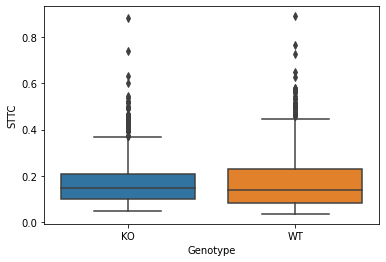

In [135]:
plt.figure()
sns.boxplot(x='Genotype', y='STTC', data = sttc_df)

In [137]:
pg.normality(data= sttc_df, dv='STTC', group='Genotype')

,W,pval,normal
KO,0.822353,3.160494e-24,False
WT,0.857320,5.679125e-25,False


In [139]:
pg.mwu(x= sttc_df['STTC'][sttc_df['Genotype']=='WT'], y= sttc_df['STTC'][sttc_df['Genotype']=='WT'], tail='one-sided')

,U-val,tail,p-val,RBC,CLES
MWU,257762.0,greater,0.500025,0.0,0.499
